**Project 2: Bike Sharing Demand Prediction (Hourly Data) using Linear Regression**

**Objective:**

To analyze hourly bike rental demand patterns influenced by weather, temperature, season, and time of day.

To build a multiple linear regression model predicting the hourly rental count.

To identify key features affecting demand peaks (rush hours, working days, seasonal trends).

To evaluate predictive accuracy and interpret model coefficients for operational insights.

**Problem Type:**
Regression (Continuous target variable — Count of rented bikes per hour)

**🔧 Evaluation Metrics:**

RMSE (Root Mean Squared Error)

MAE (Mean Absolute Error)

R² Score (Coefficient of Determination)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from datetime import datetime, date, time
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/QIP_IIIT_A/Learning/Model Projects/Linear Regression/Bike Sharing Demand Prediction-hour/Bike Sharing Demand Prediction-hour.csv')

In [3]:
df.shape

(17379, 17)

# **Data Overview & Cleaning**

In [4]:
df.isnull().sum() # displays count of missing values

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [5]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
#df['date'] = [datetime.strptime(df['dteday'][i], "%Y-%m-%d") for i in range(len(df['dteday']))]
df['date'] = pd.to_datetime(df['dteday'])
#df['hour'] = [time(int(df["hr"][i])) for i in range(len(df["hr"]))]
df['hour'] = pd.to_timedelta(df['hr'], unit='h')
#df['time'] = [datetime.combine(df['date'][i], df['hour'][i]) for i in range(len(df['date']))]
df['time'] = df['date'] + df['hour']

In [7]:
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date,hour,time
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01,0 days 00:00:00,2011-01-01 00:00:00
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01,0 days 01:00:00,2011-01-01 01:00:00
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01,0 days 02:00:00,2011-01-01 02:00:00
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01,0 days 03:00:00,2011-01-01 03:00:00
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01,0 days 04:00:00,2011-01-01 04:00:00
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,2011-01-01,0 days 05:00:00,2011-01-01 05:00:00
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,2011-01-01,0 days 06:00:00,2011-01-01 06:00:00
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,2011-01-01,0 days 07:00:00,2011-01-01 07:00:00
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,2011-01-01,0 days 08:00:00,2011-01-01 08:00:00
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,2011-01-01,0 days 09:00:00,2011-01-01 09:00:00


In [8]:
df = df.drop('instant', axis=1)
df = df.drop('date', axis=1)
df = df.drop('hour', axis=1)

In [9]:
df.head(2)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00


# **EDA**

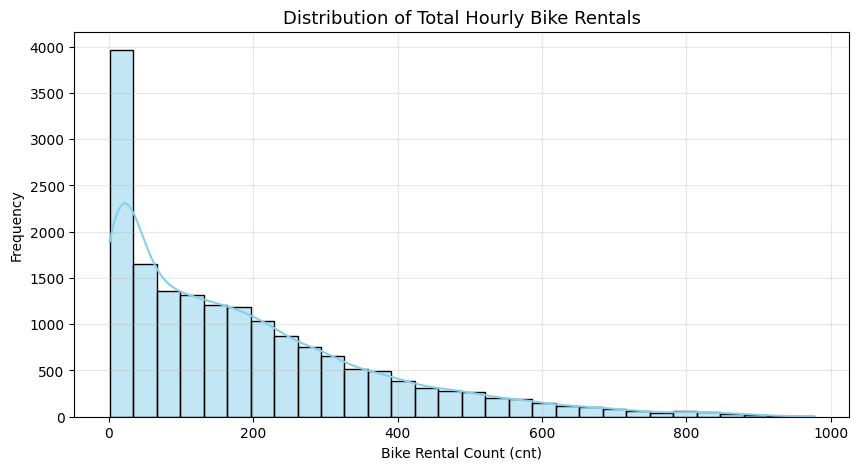

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df['cnt'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Total Hourly Bike Rentals", fontsize=13)
plt.xlabel("Bike Rental Count (cnt)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

# **Temporal Behavior**

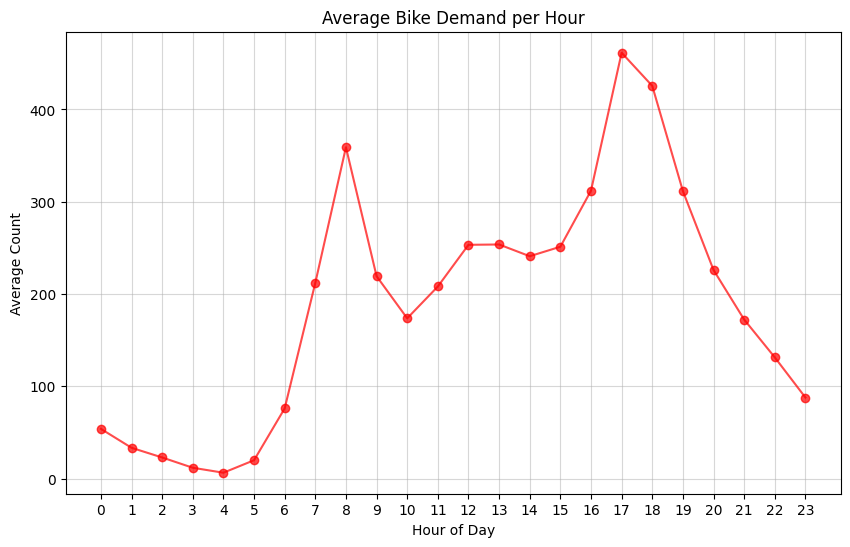

In [11]:
plt.figure(figsize=(10,6))
plt.plot(df.groupby('hr')['cnt'].mean(), color='red', marker='o', alpha=0.7)
plt.xticks(range(0,24))
plt.title("Average Bike Demand per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Count")
plt.grid(alpha=0.5)
plt.show()

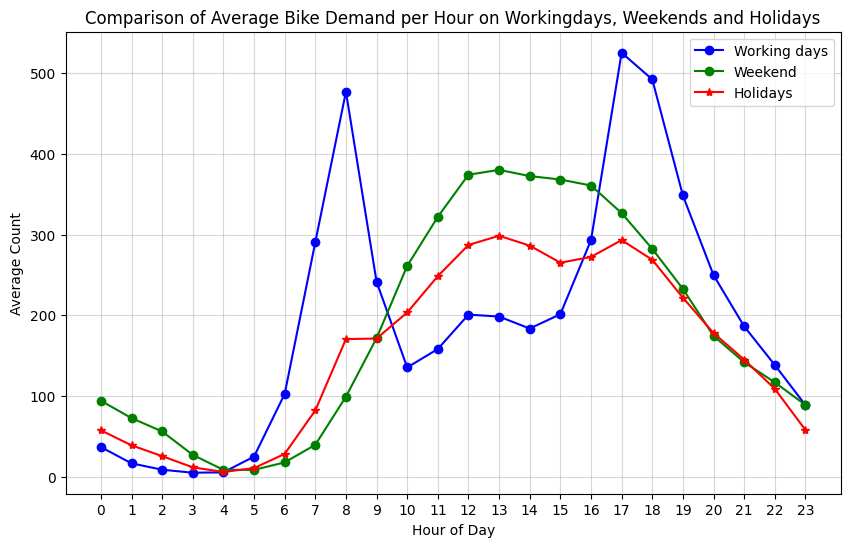

In [12]:
plt.figure(figsize= (10,6))
plt.plot(range(0,24), df.groupby(['hr', 'workingday'])['cnt'].mean().unstack()[1], marker='o', color=('blue'))
plt.plot(range(0,24), (df.groupby(['hr', 'weekday'])['cnt'].mean().unstack()[0] + df.groupby(['hr', 'weekday'])['cnt'].mean().unstack()[6])/2, marker='o', color=('green'))
plt.plot(range(0,24), df.groupby(['hr', 'holiday'])['cnt'].mean().unstack()[1], marker='*', color=('red'))
plt.xticks(range(0,24))
plt.title("Comparison of Average Bike Demand per Hour on Workingdays, Weekends and Holidays")
plt.xlabel("Hour of Day")
plt.ylabel("Average Count")
plt.legend(labels=["Working days", "Weekend", "Holidays"])
plt.grid(alpha=0.5)
plt.show()


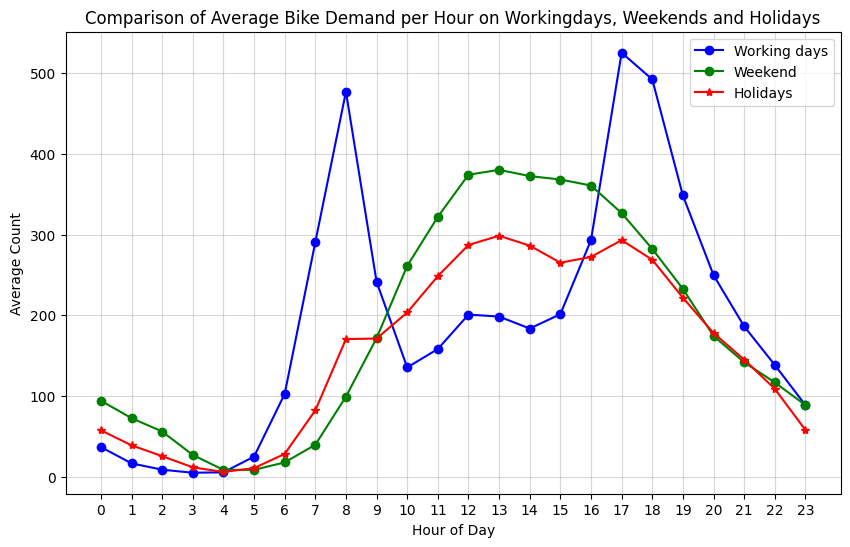

In [13]:
df_workingday = df[df['workingday'] == 1]
df_weekend = pd.concat([df[df['weekday'] == 0], df[df['weekday'] == 6]])
df_holiday = df[df['holiday'] == 1]

plt.figure(figsize= (10,6))
plt.plot(df_workingday.groupby('hr')['cnt'].mean(), marker='o', color='blue')
plt.plot(df_weekend.groupby('hr')['cnt'].mean(), marker='o', color='green')
plt.plot(df_holiday.groupby('hr')['cnt'].mean(), marker='*', color='red')
plt.xticks(range(0,24))
plt.title("Comparison of Average Bike Demand per Hour on Workingdays, Weekends and Holidays")
plt.xlabel("Hour of Day")
plt.ylabel("Average Count")
plt.legend(labels=["Working days", "Weekend", "Holidays"])
plt.grid(alpha=0.5)
plt.show()

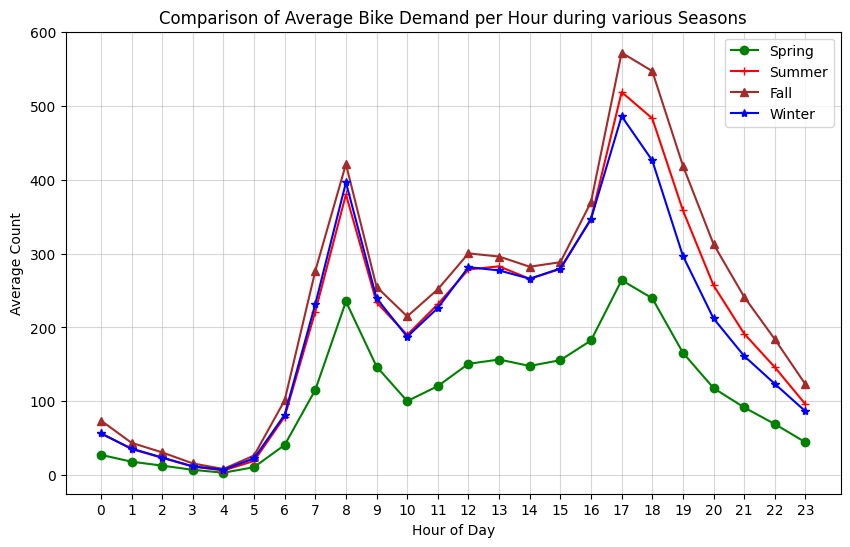

In [14]:
season_labels = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}

df_spring = df[df['season'] == 1]
df_summer = df[df['season'] == 2]
df_fall = df[df['season'] == 3]
df_winter = df[df['season'] == 4]

plt.figure(figsize=(10,6))
plt.plot(df_spring.groupby('hr')['cnt'].mean(), marker='o', color='green')
plt.plot(df_summer.groupby('hr')['cnt'].mean(), marker='+', color='red')
plt.plot(df_fall.groupby('hr')['cnt'].mean(), marker='^', color='brown')
plt.plot(df_winter.groupby('hr')['cnt'].mean(), marker='*', color='blue')
plt.xticks(range(24))
plt.title("Comparison of Average Bike Demand per Hour during various Seasons")
plt.xlabel("Hour of Day")
plt.ylabel("Average Count")
plt.legend(labels=season_labels.values())
plt.grid(alpha=0.5)
plt.show()

In [15]:
df_fall.shape

(4496, 17)

In [16]:
weather_names = {1: 'Clear', 2: 'Misty', 3: 'LightRainSnow', 4: 'HeavyRainSnow'}

#df['weather_labels'] = [weather_names[value] for value in df['weathersit']]

df['weather_labels'] = df['weathersit'].map(weather_names)
df['season_labels'] = df['season'].map(season_labels)

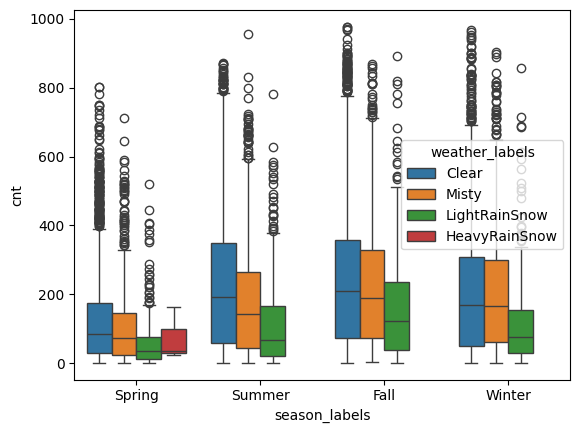

In [17]:
sns.boxplot(x='season_labels', y='cnt', hue='weather_labels', data=df)
plt.show()

# **Weather Influence**

In [18]:
df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
cnt,0.404772,0.400929,-0.322911,0.093234,1.000000


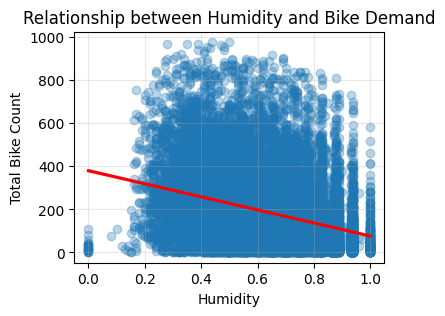

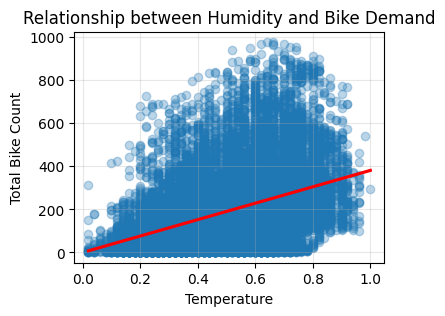

In [19]:
plt.figure(figsize=(4,3))
sns.regplot(x='hum', y='cnt', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relationship between Humidity and Bike Demand')
plt.xlabel('Humidity')
plt.ylabel('Total Bike Count')
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(4,3))
sns.regplot(x='temp', y='cnt', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relationship between Humidity and Bike Demand')
plt.xlabel('Temperature')
plt.ylabel('Total Bike Count')
plt.grid(alpha=0.3)
plt.show()

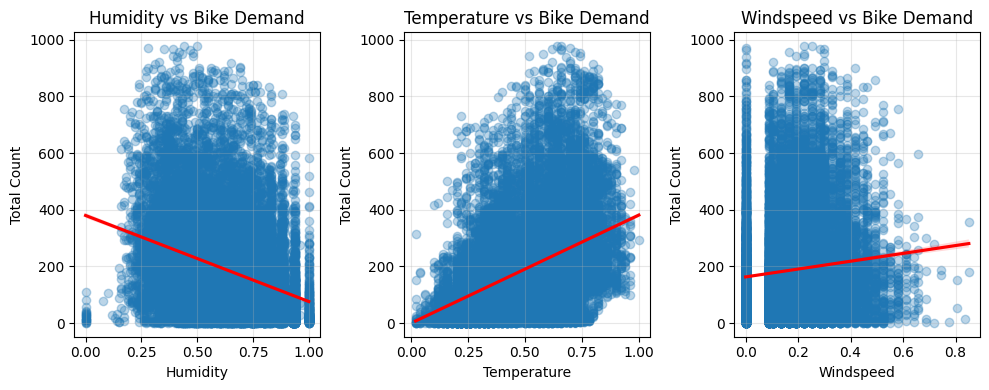

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

sns.regplot(ax=axes[0], x='hum', y='cnt', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
axes[0].set_title('Humidity vs Bike Demand')
axes[0].set_xlabel('Humidity')
axes[0].set_ylabel('Total Count')
axes[0].grid(alpha=0.3)

sns.regplot(ax=axes[1], x='temp', y='cnt', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
axes[1].set_title('Temperature vs Bike Demand')
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('Total Count')
axes[1].grid(alpha=0.3)

sns.regplot(ax=axes[2], x='windspeed', y='cnt', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
axes[2].set_title('Windspeed vs Bike Demand')
axes[2].set_xlabel('Windspeed')
axes[2].set_ylabel('Total Count')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# **Feature Correlation Summary**

In [36]:
corr = df.corr(numeric_only=True)

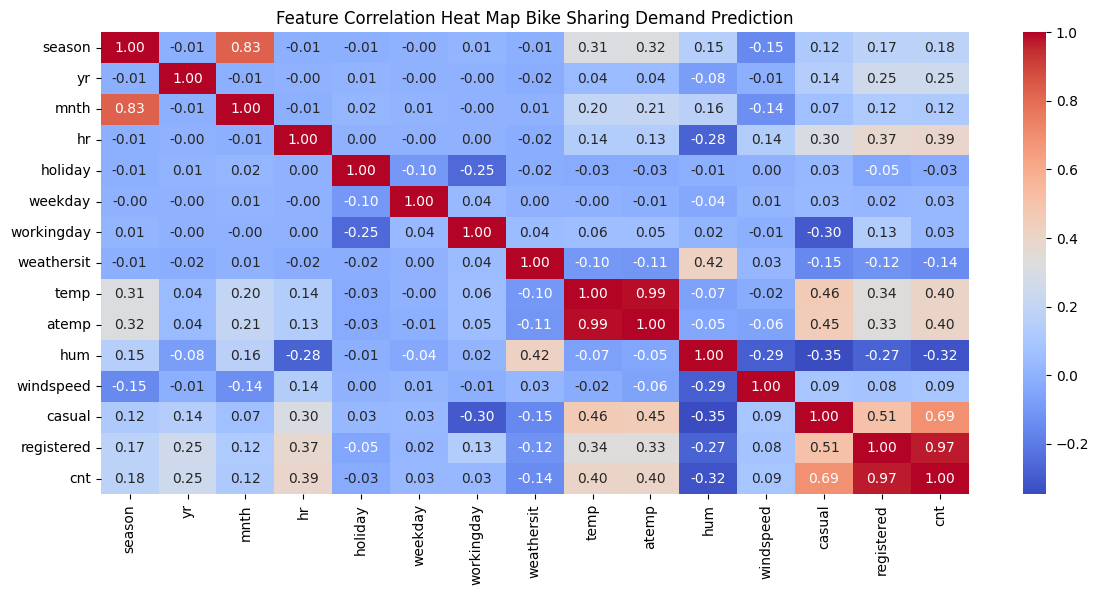

In [39]:
plt.figure(figsize=(14,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heat Map Bike Sharing Demand Prediction")
plt.show()

# **Feature Importance**

In [23]:
y = df['cnt']
X = df.drop(columns=['cnt', 'casual', 'registered', 'time', 'dteday', 'weather_labels',	'season_labels'])

In [24]:
train_size = int(0.8 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

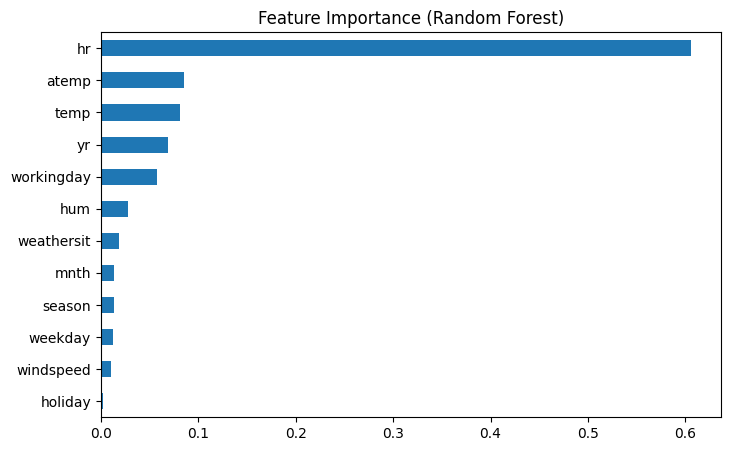

In [26]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title('Feature Importance (Random Forest)')
plt.show()

# **Model Building & Evaluation**

In [27]:
y = df['cnt']
X = df.drop(columns=['cnt', 'casual', 'registered', 'time', 'dteday', 'weather_labels',	'season_labels', 'atemp', 'mnth'])

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=47)

In [28]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(x_test)

In [30]:
from math import sqrt
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error = {mae:.3f}")
print(f"Root Mean Squared Error = {rmse:.3f}")
print(f"R² = {r2:.3f}")

Mean Absolute Error = 104.081
Root Mean Squared Error = 138.804
R² = 0.396


# **Visualization**

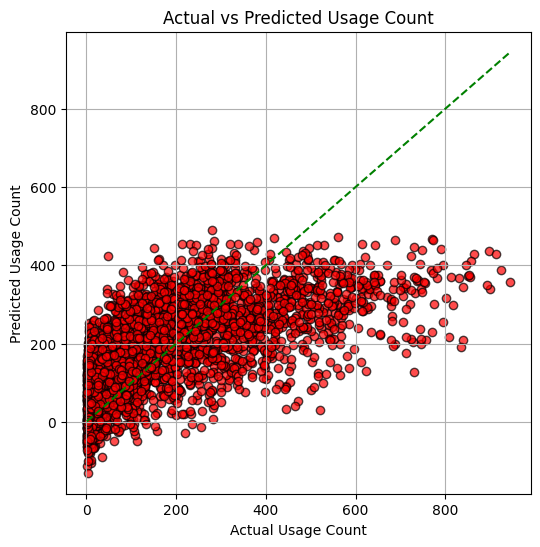

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='red', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--')
plt.title("Actual vs Predicted Usage Count")
plt.xlabel("Actual Usage Count")
plt.ylabel("Predicted Usage Count")
plt.grid(True)
plt.show()

In [32]:
residual = []
for value in zip(np.array(y_test), y_pred):
  residual.append(value[0] - value[1])
residual = np.array(residual)
len(residual)

3476

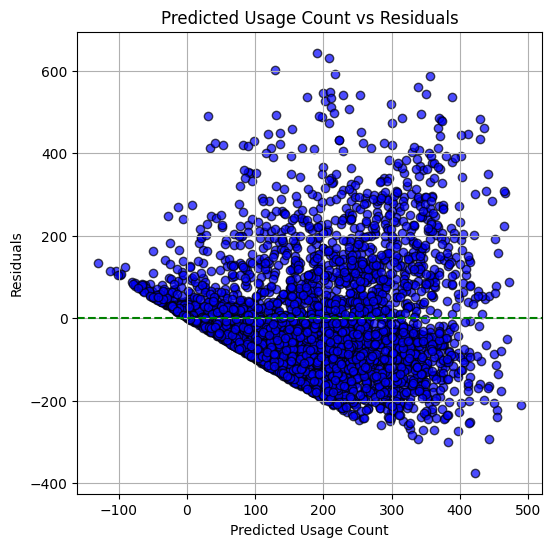

In [33]:
plt.figure(figsize=(6,6))
plt.scatter(y_pred, residual, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel("Predicted Usage Count")
plt.ylabel("Residuals")
plt.title("Predicted Usage Count vs Residuals")
plt.grid(True)
plt.show()

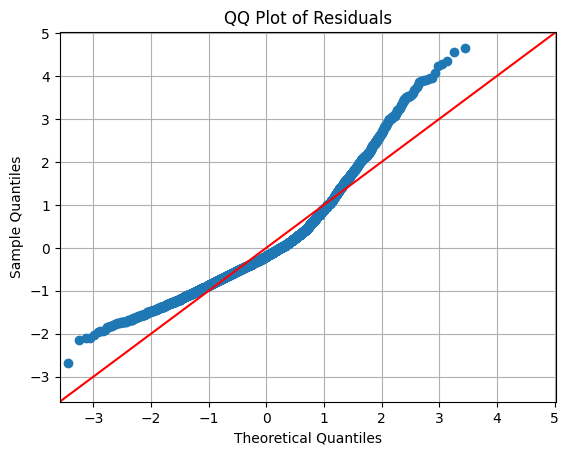

In [34]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming your residuals are stored in a variable called 'residuals'
sm.qqplot(residual, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.grid(True)
plt.show()